In [1]:
import pandas as pd 
from bokeh.models import ColumnDataSource
from bokeh.plotting import figure, output_file, show,output_notebook
output_notebook()
# bokeh.plotting is a Python library that targets modern web browsers for presentation.
# Bokeh can help anyone who would like to quickly and easily create interactive plots, dashboards, and data applications.

Loading BokehJS ...

In [2]:
def make_dashboard(x, gdp_change, unemployment, title, file_name):
    output_file(file_name)
    p = figure(title=title, x_axis_label = 'Year', y_axis_label = '%')
    p.line(x.squeeze(), gdp_change.squeeze(),line_width=4 , color='green', legend='% GDP growth'  )
    p.line(x.squeeze(), unemployment.squeeze(),line_width=4, color='blue', legend='% Unemployemnet') 
    show(p)
# this is the definition of the function which we'll use it to make the dashboard

In [3]:
# The code was removed by Watson Studio for sharing.

In [4]:
#Unemployment_df[Unemployment_df['unemployment']>25]

In [5]:
# Inserting of the "GDP growth" CSV file from the "My Watson Project Storage" to the Notebook:

body = client_867245027fa7450bb86cb10e3d9f0cf7.get_object(Bucket='hbp4dsampai-donotdelete-pr-cfy2bp43tuer7b',Key='DZ_GDP_growth.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

GDP_df = pd.read_csv(body)
#GDP_df.head()

In [6]:
#Make a new DataFrame from GDP_df but the years between 1989-2016 : 

filter_1= GDP_df['year']<2017
filter_2 = GDP_df['year']>1988
GDP_df_2 = GDP_df[filter_1 & filter_2]
GDP_df_2.reset_index(drop=True)
GDP_df_2.head()

,year,GDP growth
28,1989,4.400002
29,1990,0.800001
30,1991,-1.200001
31,1992,1.800002
32,1993,-2.100001


In [7]:
# Definition of the "make_dashboard" function's parameters : 

x = pd.DataFrame(GDP_df_2.loc[:,'year'])
gdp_change = pd.DataFrame(GDP_df_2.loc[:,'GDP growth'])
unemployment = pd.DataFrame(Unemployment_df.loc[:,'unemployment'])
title = 'DZ_Dashboard'
file_name ='DZ_GDP_Unemployment.html'

In [8]:
make_dashboard(x, gdp_change, unemployment, title, file_name)

In [40]:
new_unemployment_df = Unemployment_df.copy()
#new_gdp_df.(Unemployment_df['unemployment'])
one_df = new_unemployment_df.join(GDP_df_2.set_index('year'), on='year', how ='outer')

one_df['year'] = one_df['year'].apply(str)

#convert dataframe to dict
data = one_df.to_dict(orient='list')
dates = one_df['year'].tolist()
source = ColumnDataSource(one_df)
#one_df
unemployment_lst = one_df['unemployment'].tolist()
gdp_lst = one_df['GDP growth'].tolist()
#gdp_lst
#unemployment_lst
#source

In [41]:
from bokeh.io import show, output_file
from bokeh.models import ColumnDataSource, FactorRange
from bokeh.plotting import figure
from bokeh.transform import factor_cmap
from bokeh.models.ranges import FactorRange

output_file("bar_nested.html")
dates = dates
indicators = ['GDP growth', 'unemployment']

x = [ (date, indicator) for date in dates for indicator in indicators ]
counts = sum(zip(data['GDP growth'], data['unemployment']), ()) # like an hstack

source = ColumnDataSource(data=dict(x=x, counts=counts))

p = figure(x_range=FactorRange(*x), plot_height=500,plot_width = 1200, title="Algeria GDP/Unemployment",
           toolbar_location=None, tools="")

p.vbar(x='x', top='counts', width=1.2 ,source=source,
      fill_color=factor_cmap('x', palette=['firebrick', 'navy'], factors=indicators, start=1, end=2))

p.y_range.start = -5
p.x_range.range_padding = 0.1
p.xaxis.major_label_orientation = 1
p.xgrid.grid_line_color = None


In [42]:
show(p)

In [43]:
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style
# check for latest version of Matplotlib
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Matplotlib version:  3.0.2


Text(0.5, 0, 'Years')

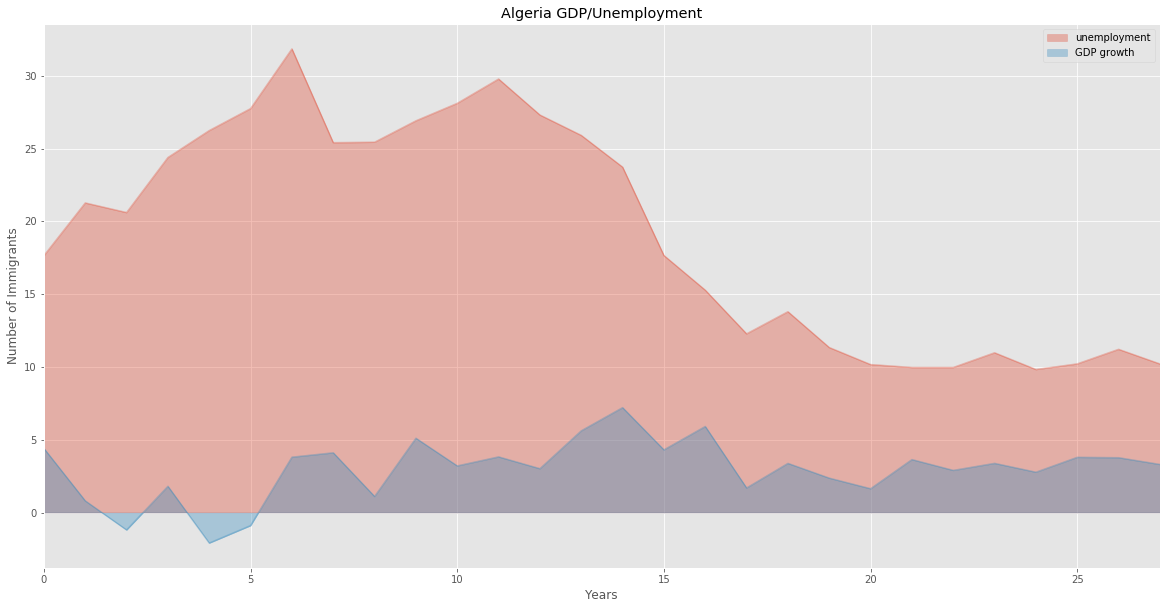

In [44]:
ax = one_df.plot(kind='area', alpha=0.35,stacked=False, figsize=(20, 10))

ax.set_title('Algeria GDP/Unemployment')
ax.set_ylabel('Number of Immigrants')
ax.set_xlabel('Years')

In [70]:
from bokeh.palettes import BuPu3, OrRd3

indicators = ['GDP growth','_','_']
indicators2 = ['_','Unemployment','_']
 
zero_lst = [0]* 28        #zero_lst = [0,0,0,......,0]
dates_lst = one_df['year'].tolist()
unemployment_lst = one_df['unemployment'].tolist()
gdp_lst = one_df['GDP growth'].tolist()

GDP = {'fruits' : dates_lst,
           'GDP growth'   : gdp_lst,
           '_' : zero_lst, 
            '_' : zero_lst}

Unemployment = {'fruits' : dates,
           '_'   :zero_lst, 
           'Unemployment'   : unemployment_lst,
           '_'   : zero_lst }  


In [71]:
p = figure(x_range=fruits, plot_height=500, plot_width=1200, y_range=(-5, 50), title="Algeria GDP growth/Unemployment")
p.vbar_stack(indicators, x='fruits',width=0.3, color=OrRd3,alpha=0.8, source=ColumnDataSource(GDP), legend=["%s " % w for w in indicators])
p.vbar_stack(indicators2, x='fruits', width=0.3, color=BuPu3,alpha=0.6, source=ColumnDataSource(Unemployment),legend=["%s " % x for x in indicators2])

p.x_range.range_padding = 0.1
p.xgrid.grid_line_color = 'blue'
p.legend.location = "top_right"


In [72]:
show(p)